In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:20,.4f}'.format

## Country-level data

Load and pivot the country-level data set

In [3]:
countries_of_interest = ['Canada', 'Denmark', 'France', 'Germany', 'Japan', 'Netherlands', 'Norway', 'Singapore',
                         'Sweden', 'Switzerland', 'United Kingdom', 'United States']

In [4]:
people_df = pd.read_csv('data/people.csv', sep=';')
peoples_pivot_df = people_df.pivot_table(index='date', columns=['country', 'indicator'], values='value').drop_duplicates()

In [5]:
stacked_france_df = peoples_pivot_df[['France']].stack('country')

In [6]:
stacked_france_df.index = stacked_france_df.index.droplevel(1)
france_df = stacked_france_df.reset_index()
france_df['date'] = pd.to_datetime(france_df['date'], format='%Y-%m-%d')

In [7]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

In [8]:
indicator_variables = list(france_df.columns.to_list())
indicator_variables.remove('date')

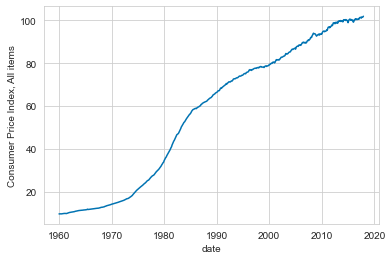

In [9]:
sns.lineplot(x='date', y='Consumer Price Index, All items', markers=True, data=france_df)

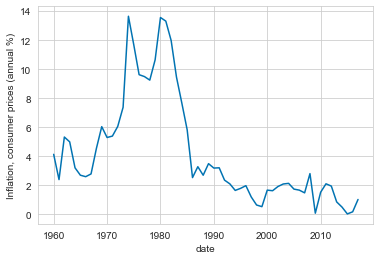

In [10]:
sns.lineplot(x='date', y='Inflation, consumer prices (annual %)', markers=True, data=france_df)

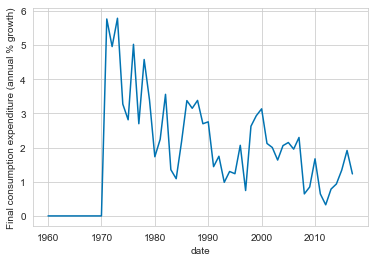

In [11]:
sns.lineplot(x='date', y='Final consumption expenditure (annual % growth)', markers=True, data=france_df)

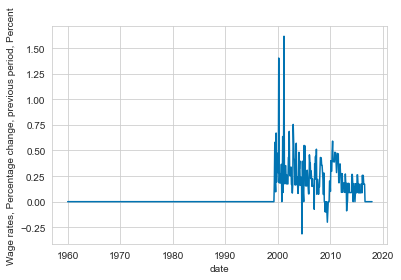

In [12]:
sns.lineplot(x='date', y='Wage rates, Percentage change, previous period, Percent', markers=True, data=france_df)

### Write labels to disk

In [13]:
label_index_df = (peoples_pivot_df.stack('country')['Inflation, consumer prices (annual %)'] / 100.0).unstack()
label_df = label_index_df.iloc[:, label_index_df.columns.get_level_values(0).isin(countries_of_interest)].interpolate()

In [14]:
label_df.head()

country,Canada,Denmark,France,Germany,Japan,Netherlands,Norway,Singapore,Sweden,Switzerland,United Kingdom,United States
date,,,,,,,,,,,,
1960-01-01,0.0136,0.0126,0.0414,0.0154,0.0357,0.0232,0.0036,0.0000,0.0414,0.0144,0.0100,0.0146
1960-02-01,0.0133,0.0144,0.0399,0.0160,0.0372,0.0224,0.0051,0.0003,0.0398,0.0147,0.0121,0.0143
1960-03-01,0.0130,0.0162,0.0385,0.0166,0.0387,0.0215,0.0066,0.0007,0.0381,0.0151,0.0141,0.0139
1960-04-01,0.0127,0.0180,0.0371,0.0173,0.0402,0.0207,0.0081,0.0010,0.0365,0.0154,0.0161,0.0136
1960-05-01,0.0125,0.0199,0.0356,0.0179,0.0417,0.0199,0.0096,0.0013,0.0348,0.0157,0.0182,0.0133


In [15]:
label_df.to_csv('timeseries-transformer/simulator_labels.csv', sep=';')